In [1]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:
df= pd.read_csv("C:/Users/JANANI V/Desktop/NLP/chatgpt_reviews.csv")
df.head()

date                 title  \
0   2/15/2025            Impressive   
1  10/16/2024         Waste of Time   
2  10/16/2024         Waste of Time   
3  12/21/2024          Not Accurate   
4   3/23/2025  Fantastic Experience   

                                              review  rating       username  \
0  Mother former community upon vote fact. Sure s...       2          ybass   
1  General paper understand main. Or age half won...       5        glenn33   
2  Here situation his high stage. Agree certainly...       4       debbie27   
3  Rule court behind growth reality. Tonight whos...       1  hannahrussell   
4  Case opportunity season road write. Effort gre...       3        cnorton   

   helpful_votes  review_length platform language   location  version  \
0             68             78   Mobile       es     Canada      3.0   
1             71            193      Web       de      India      4.1   
2             66            184      Web       hi      India      4.1   
3              5            193      Web       fr     Canada      4.0   
4             71            131      Web       hi  Australia      4.1   

  verified_purchase  
0                No  
1               Yes  
2               Yes  
3               Yes  
4                No

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Check basic statistics
print(df.describe())


date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64
date                  object
title                 object
review                object
rating                 int64
username              object
helpful_votes          int64
review_length          int64
platform              object
language              object
location              object
version              float64
verified_purchase     object
dtype: object
             rating  helpful_votes  review_length       version
count  10000.000000   10000.000000   10000.000000  10000.000000
mean       2.987000      50.347800     147.034000      3.651070
std        1.424161      28.914613      34.911708      0.438935
min        1.000000       0.000000      30.000000      3.000000
25%        2.000000      25.0

In [4]:
# Check for duplicate reviews
duplicate_count = df.duplicated(subset=['review']).sum()
print(f"Total duplicate reviews: {duplicate_count}")

# Remove duplicates if needed
df = df.drop_duplicates(subset=['review'], keep='first')

# Verify duplicates are removed
print(df.shape)


Total duplicate reviews: 0
(10000, 12)


In [5]:
#Clean & Prepare Text for Analysis
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove numbers and special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

df['review_cleaned'] = df['review'].apply(clean_text)

# Display a sample
print(df[['review', 'review_cleaned']].head())


                                              review  \
0  Mother former community upon vote fact. Sure s...   
1  General paper understand main. Or age half won...   
2  Here situation his high stage. Agree certainly...   
3  Rule court behind growth reality. Tonight whos...   
4  Case opportunity season road write. Effort gre...   

                                      review_cleaned  
0  mother former community upon vote fact sure st...  
1  general paper understand main or age half wond...  
2  here situation his high stage agree certainly ...  
3  rule court behind growth reality tonight whose...  
4  case opportunity season road write effort gree...  


In [6]:

from nltk.corpus import stopwords

nltk.download('stopwords')

# Load default stopwords
stop_words = set(stopwords.words("english"))

# Add custom stopwords
custom_stopwords = stop_words | {"sure", "certainly","gun", "oil", "sort", "upon", "must", "skin", "bag", "today", "laugh", "represent", "however", "although","mr", "ten", "week", "hour", "east", "western","tree","man","floor"}

# Remove words that are important for sentiment detection
custom_stopwords = custom_stopwords - {"not", "no", "never"}

print("Final Stopwords List:", custom_stopwords)  # Check stopwords before applying


Final Stopwords List: {'so', "they'd", 'they', 'while', "shan't", 'after', 'don', 'just', 'doesn', 'aren', 'its', 'ain', 'theirs', 'tree', 'sure', 'm', 'them', 'does', "he's", "he'd", 'with', "shouldn't", 'out', 'or', 'd', "he'll", 'has', 'are', 'our', 'being', 'from', 'do', "needn't", 'floor', 'must', 'her', 'couldn', 's', 'haven', 'have', "won't", 'we', 'me', "didn't", 'an', 'but', 'mightn', "i've", 'more', 'was', 'such', "we've", 'certainly', 'isn', 'which', "hadn't", 'below', "i'm", 'mr', 'some', 'once', 'myself', 'now', 'for', "they're", "it's", "it'd", 'between', 'itself', 'bag', 'western', 'during', "weren't", 'most', 'mustn', 'am', 'won', 'than', 'further', 'i', 'same', 'themselves', "couldn't", 'shouldn', 'shan', 'very', 'hour', 'about', 'and', 'himself', "she's", 'gun', 'their', 'each', 'o', 'why', 'down', 'he', 'other', 'hasn', 'the', "should've", 'did', 'a', "doesn't", "wasn't", 'although', "mustn't", 'can', 'll', 'too', 'wasn', 'under', 'yourselves', 'will', 'what', 'upon'

[nltk_data] Downloading package stopwords to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: " ".join([word for word in x.split() if word not in custom_stopwords]))

# Verify changes
print(df[['review', 'review_cleaned']].head())


                                              review  \
0  Mother former community upon vote fact. Sure s...   
1  General paper understand main. Or age half won...   
2  Here situation his high stage. Agree certainly...   
3  Rule court behind growth reality. Tonight whos...   
4  Case opportunity season road write. Effort gre...   

                                      review_cleaned  
0  mother former community vote fact stock rich c...  
1  general paper understand main age half wonder ...  
2  situation high stage agree blue thousand sense...  
3  rule court behind growth reality tonight whose...  
4  case opportunity season road write effort gree...  


In [8]:
# Download necessary NLTK resources
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('omw-1.4')  # Additional resource for WordNet Lemmatization


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JANANI V\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\JANANI V\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
nltk.data.path.append("C:/Users/JANANI V/AppData/Roaming/nltk_data")

In [10]:
import os
print(os.listdir(nltk.data.find("taggers")))


['averaged_perceptron_tagger', 'averaged_perceptron_tagger.zip', 'averaged_perceptron_tagger_eng', 'averaged_perceptron_tagger_eng.zip']


In [11]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Convert POS tags from NLTK to WordNet format
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].lower()  # Extract first letter of POS tag
    pos_dict = {'a': wordnet.ADJ, 'r': wordnet.ADV, 'n': wordnet.NOUN, 'v': wordnet.VERB}
    return pos_dict.get(tag, wordnet.NOUN)  # Default to noun if tag isn't found

# Apply improved lemmatization
df['review_lemmatized'] = df['review_cleaned'].apply(lambda x: " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(x)]))

# Check the difference before & after lemmatization
df['lemmatization_check'] = df.apply(lambda row: f"Before: {row['review_cleaned']} | After: {row['review_lemmatized']}", axis=1)
print(df[['lemmatization_check']].head())



                                 lemmatization_check
0  Before: mother former community vote fact stoc...
1  Before: general paper understand main age half...
2  Before: situation high stage agree blue thousa...
3  Before: rule court behind growth reality tonig...
4  Before: case opportunity season road write eff...


In [12]:
for index, row in df[['lemmatization_check']].iterrows():
    print(row['lemmatization_check'])
    print("-" * 50)  # Add separator for better readability


Before: mother former community vote fact stock rich could soldier pm wear | After: mother former community vote fact stock rich could soldier pm wear
--------------------------------------------------
Before: general paper understand main age half wonder positive senior book agency professional alone away sit like law policy news book moment approach kind future | After: general paper understand main age half wonder positive senior book agency professional alone away sit like law policy news book moment approach kind future
--------------------------------------------------
Before: situation high stage agree blue thousand sense help remember media country rich box increase place better energy tough nation care think huge game value | After: situation high stage agree blue thousand sense help remember medium country rich box increase place well energy tough nation care think huge game value
--------------------------------------------------
Before: rule court behind growth reality toni

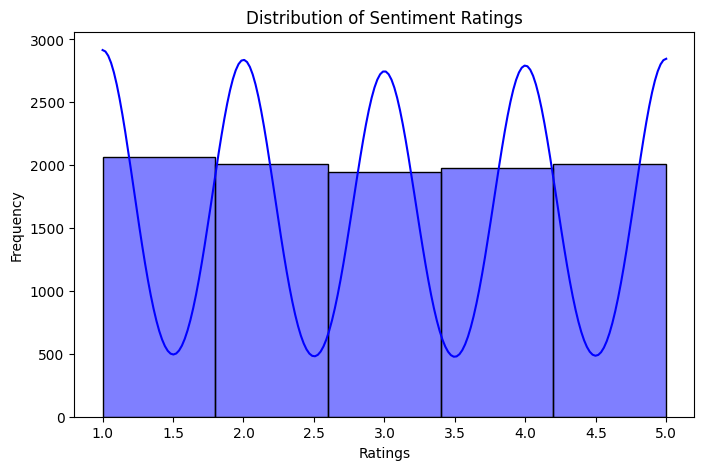

In [13]:
#EDA
#1: Check Review Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=True, color="blue")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Ratings")
plt.show()

In [14]:
#Visualize word frequency using word clouds and histograms.
from collections import Counter

# Split all words in the dataset
all_words = " ".join(df['review_lemmatized']).split()

# Count frequency of each word
word_freq = Counter(all_words).most_common(20)  # Top 20 words

print("Most common words:", word_freq)


Most common words: [('well', 472), ('feel', 459), ('interest', 448), ('even', 444), ('include', 435), ('operation', 269), ('care', 268), ('learn', 267), ('heavy', 266), ('read', 265), ('provide', 264), ('show', 263), ('speak', 263), ('present', 261), ('kind', 260), ('left', 260), ('offer', 259), ('beautiful', 258), ('authority', 258), ('radio', 257)]


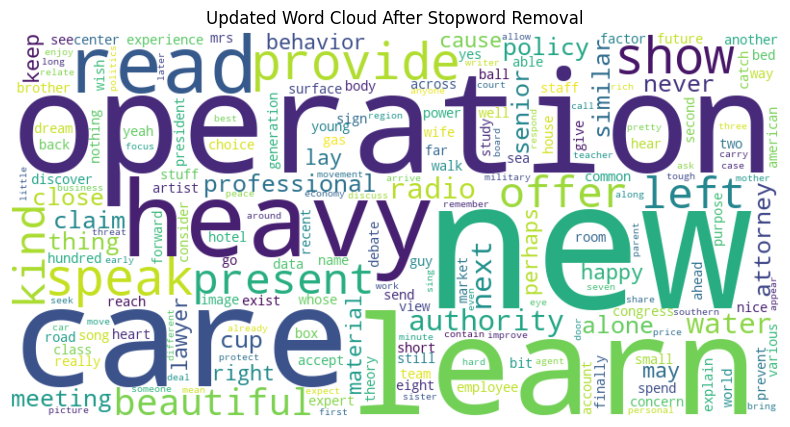

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate refined word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['review_cleaned']))

# Display word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Updated Word Cloud After Stopword Removal")
plt.show()


In [16]:
# 1. What is the distribution of review ratings?
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Check sentiment distribution
print(df['sentiment'].value_counts())


sentiment
negative    4069
positive    3988
neutral     1943
Name: count, dtype: int64


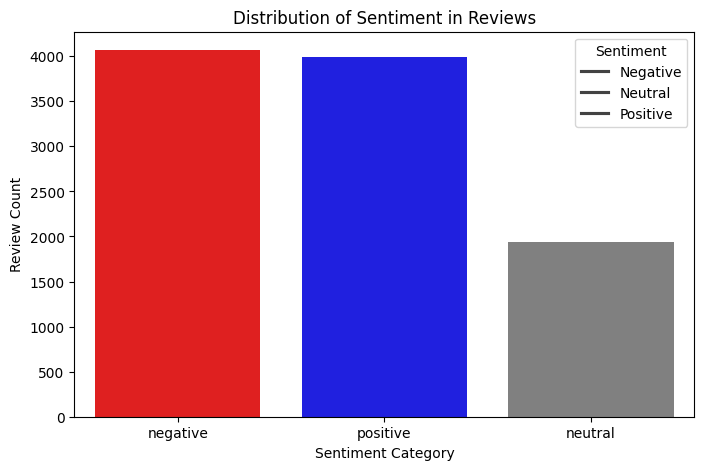

In [17]:
# Visualize the distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare sentiment counts
sentiment_counts = df['sentiment'].value_counts().reset_index()  # Convert Series to DataFrame
sentiment_counts.columns = ['Sentiment', 'Count']  # Rename columns

# Set figure size
plt.figure(figsize=(8,5))

# Create bar chart with hue
sns.barplot(data=sentiment_counts, x="Sentiment", y="Count", hue="Sentiment", palette={'negative': 'red', 'neutral': 'gray', 'positive': 'blue'})

# Add labels & title
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.title("Distribution of Sentiment in Reviews")
# Add legend
plt.legend(title="Sentiment", loc='upper right', labels=['Negative', 'Neutral', 'Positive'], frameon=True)
# Show plot
plt.show()


C:\Users\JANANI V\AppData\Local\Temp\ipykernel_7444\1121799352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['review_length'], palette={'negative': 'red', 'neutral': 'gray', 'positive': 'blue'})


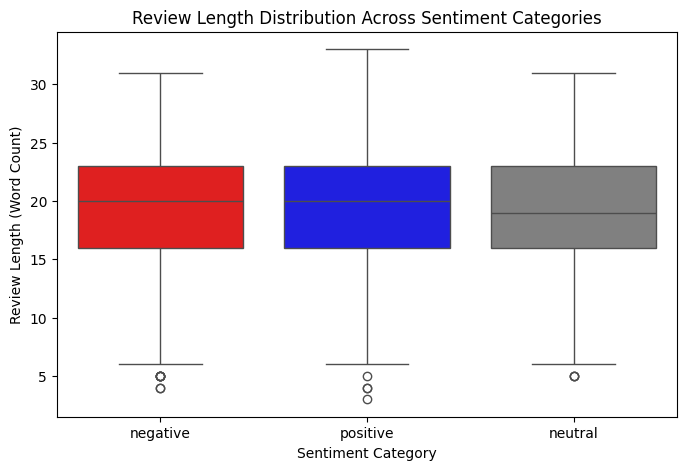

In [18]:
#review length analysis

# Create a new column for review length (word count)
df['review_length'] = df['review_cleaned'].apply(lambda x: len(x.split()))

# Plot boxplot to visualize review lengths across sentiment categories
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sentiment'], y=df['review_length'], palette={'negative': 'red', 'neutral': 'gray', 'positive': 'blue'})

# Add labels & title
plt.xlabel("Sentiment Category")
plt.ylabel("Review Length (Word Count)")
plt.title("Review Length Distribution Across Sentiment Categories")

# Show plot
plt.show()


In [19]:
# Define the threshold (e.g., reviews longer than median word count)
median_length = df['review_length'].median()
df['helpful_review'] = df['review_length'].apply(lambda x: 'Helpful' if x >= median_length else 'Not Helpful')

# Count helpful vs. not helpful reviews
helpful_counts = df['helpful_review'].value_counts()
print(helpful_counts)


helpful_review
Helpful        5099
Not Helpful    4901
Name: count, dtype: int64


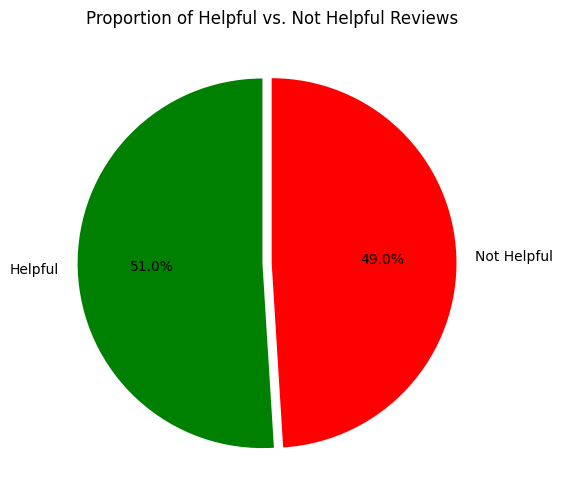

In [20]:

# Pie chart for helpful reviews
plt.figure(figsize=(6,6))
plt.pie(helpful_counts, labels=helpful_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90, explode=(0.05, 0))

# Add title
plt.title("Proportion of Helpful vs. Not Helpful Reviews")
plt.show()


In [21]:
helpful_sentiment_counts = df.groupby(['sentiment', 'helpful_review']).size().unstack()

# Display counts
print(helpful_sentiment_counts)


helpful_review  Helpful  Not Helpful
sentiment                           
negative           2063         2006
neutral             969          974
positive           2067         1921


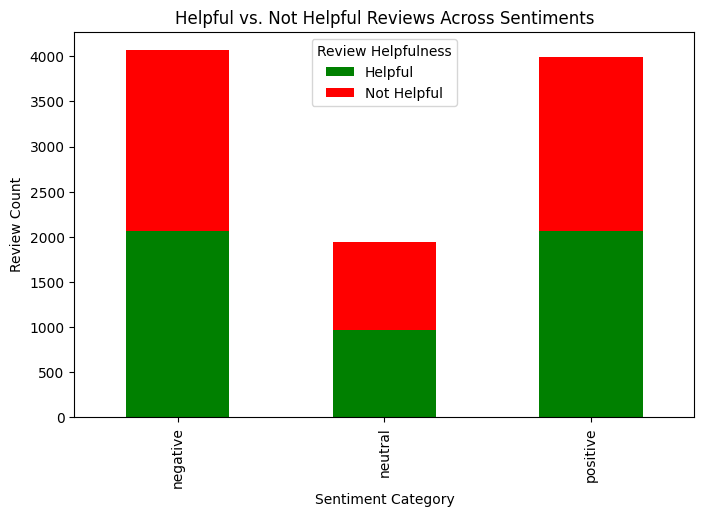

In [22]:
import matplotlib.pyplot as plt

# Plot stacked bar chart
helpful_sentiment_counts.plot(kind='bar', stacked=True, figsize=(8,5), color=['green', 'red'])

# Add labels & title
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.title("Helpful vs. Not Helpful Reviews Across Sentiments")

# Show plot
plt.legend(title="Review Helpfulness")
plt.show()


In [23]:
from collections import Counter

# Split helpful & not helpful reviews
helpful_reviews = " ".join(df[df['helpful_review'] == 'Helpful']['review_cleaned'])
not_helpful_reviews = " ".join(df[df['helpful_review'] == 'Not Helpful']['review_cleaned'])

# Get top words for each category
helpful_words = Counter(helpful_reviews.split()).most_common(20)
not_helpful_words = Counter(not_helpful_reviews.split()).most_common(20)

# Display keywords
print("Top keywords in Helpful reviews:", helpful_words)
print("Top keywords in Not Helpful reviews:", not_helpful_words)


Top keywords in Helpful reviews: [('offer', 171), ('box', 170), ('sing', 170), ('attorney', 169), ('learn', 168), ('claim', 167), ('back', 167), ('no', 167), ('speak', 166), ('left', 166), ('note', 166), ('care', 165), ('team', 165), ('give', 165), ('provide', 164), ('around', 163), ('half', 162), ('show', 162), ('house', 162), ('blood', 162)]
Top keywords in Not Helpful reviews: [('behavior', 121), ('meeting', 116), ('professional', 114), ('according', 114), ('remember', 114), ('generation', 113), ('operation', 113), ('recent', 112), ('employee', 111), ('across', 111), ('move', 111), ('serious', 111), ('already', 111), ('opportunity', 111), ('indicate', 109), ('organization', 109), ('policy', 109), ('future', 109), ('development', 109), ('never', 109)]


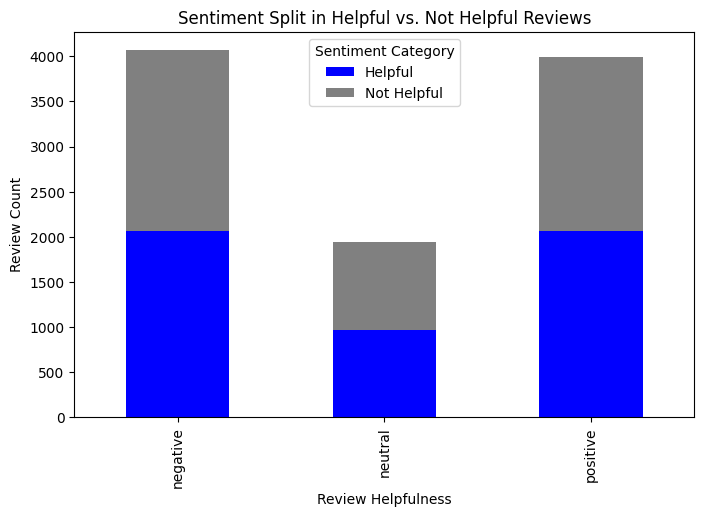

In [24]:

# Plot stacked bar chart
helpful_sentiment_counts.plot(kind='bar', stacked=True, figsize=(8,5), color=['blue', 'gray', 'red'])

# Add labels & title
plt.xlabel("Review Helpfulness")
plt.ylabel("Review Count")
plt.title("Sentiment Split in Helpful vs. Not Helpful Reviews")

# Show plot
plt.legend(title="Sentiment Category")
plt.show()


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER if needed
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['review_cleaned'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sample scores
print(df[['review_cleaned', 'sentiment_score']].head())


[nltk_data] Downloading package vader_lexicon to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      review_cleaned  sentiment_score
0  mother former community vote fact stock rich c...           0.5574
1  general paper understand main age half wonder ...           0.8176
2  situation high stage agree blue thousand sense...           0.9661
3  rule court behind growth reality tonight whose...           0.4019
4  case opportunity season road write effort gree...          -0.2732


In [26]:
def classify_sentiment(score):
    if score > 0.75:
        return "Strongly Positive"
    elif score > 0.5:
        return "Moderately Positive"
    elif score > 0.25:
        return "Neutral"
    elif score >= 0:
        return "Moderately Negative"
    else:
        return "Strongly Negative"

# Apply classification
df['sentiment_strength'] = df['sentiment_score'].apply(classify_sentiment)

# Count sentiment strength in helpful vs. not helpful reviews
sentiment_intensity_counts = df.groupby(['helpful_review', 'sentiment_strength']).size().unstack()

# Display results
print(sentiment_intensity_counts)


sentiment_strength  Moderately Negative  Moderately Positive  Neutral  \
helpful_review                                                          
Helpful                             765                 1196      888   
Not Helpful                        1200                 1037     1060   

sentiment_strength  Strongly Negative  Strongly Positive  
helpful_review                                            
Helpful                          1062               1188  
Not Helpful                      1006                598  


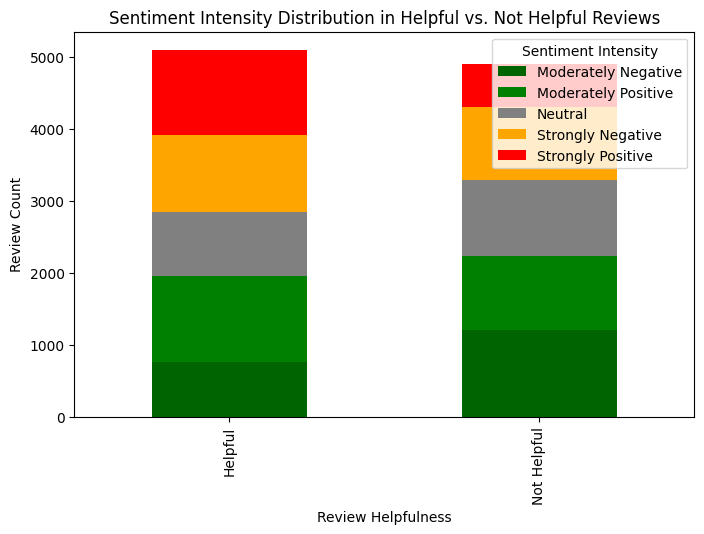

In [27]:

# Plot sentiment intensity distribution
sentiment_intensity_counts.plot(kind='bar', stacked=True, figsize=(8,5), color=['darkgreen', 'green', 'gray', 'orange', 'red'])

# Add labels & title
plt.xlabel("Review Helpfulness")
plt.ylabel("Review Count")
plt.title("Sentiment Intensity Distribution in Helpful vs. Not Helpful Reviews")

# Show plot
plt.legend(title="Sentiment Intensity")
plt.show()


In [28]:
from collections import Counter

# Extract words from strongly positive and strongly negative reviews
positive_reviews = " ".join(df[df['sentiment_strength'] == 'Strongly Positive']['review_cleaned'])
negative_reviews = " ".join(df[df['sentiment_strength'] == 'Strongly Negative']['review_cleaned'])

# Count top words
positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

# Display keyword results
print("Top keywords in Strongly Positive reviews:", positive_words)
print("Top keywords in Strongly Negative reviews:", negative_words)


Top keywords in Strongly Positive reviews: [('best', 145), ('beautiful', 141), ('happy', 139), ('care', 125), ('win', 124), ('peace', 123), ('kind', 116), ('free', 111), ('successful', 109), ('improve', 109), ('great', 108), ('rich', 107), ('enjoy', 107), ('pretty', 107), ('nice', 99), ('party', 99), ('yes', 98), ('agreement', 97), ('success', 97), ('benefit', 96)]
Top keywords in Strongly Negative reviews: [('threat', 154), ('bad', 137), ('suffer', 135), ('war', 130), ('wrong', 127), ('crime', 127), ('worry', 123), ('fear', 116), ('poor', 116), ('attack', 112), ('lose', 107), ('argue', 106), ('trouble', 106), ('fight', 106), ('stop', 101), ('drop', 98), ('no', 97), ('difficult', 95), ('avoid', 94), ('pressure', 93)]


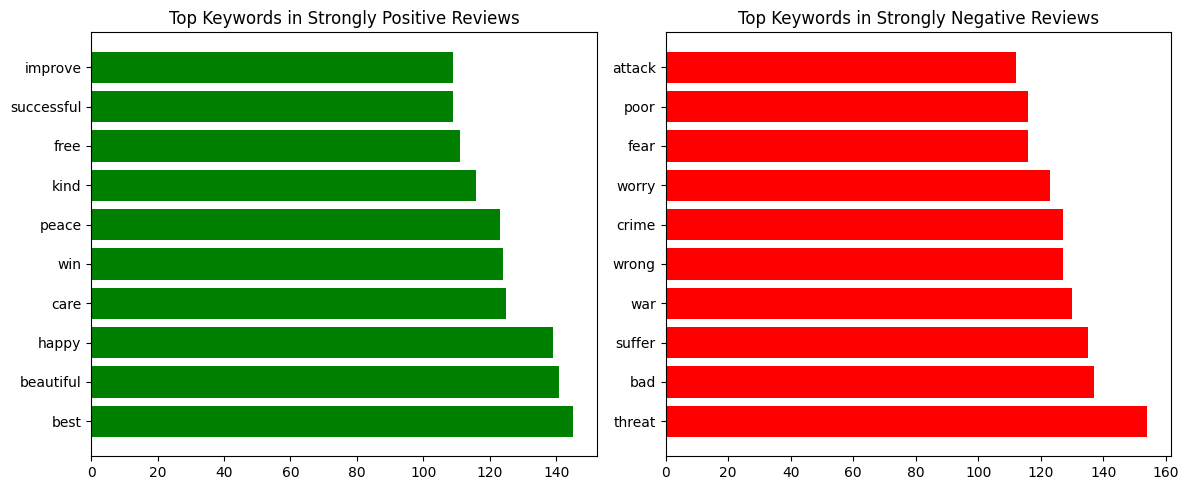

In [29]:
# Convert word frequencies to DataFrame
positive_df = pd.DataFrame(positive_words[:10], columns=['Word', 'Count'])
negative_df = pd.DataFrame(negative_words[:10], columns=['Word', 'Count'])

# Create side-by-side bar chart
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Strongly Positive review keywords
axes[0].barh(positive_df['Word'], positive_df['Count'], color='green')
axes[0].set_title("Top Keywords in Strongly Positive Reviews")

# Strongly Negative review keywords
axes[1].barh(negative_df['Word'], negative_df['Count'], color='red')
axes[1].set_title("Top Keywords in Strongly Negative Reviews")

# Adjust layout
plt.tight_layout()
plt.show()


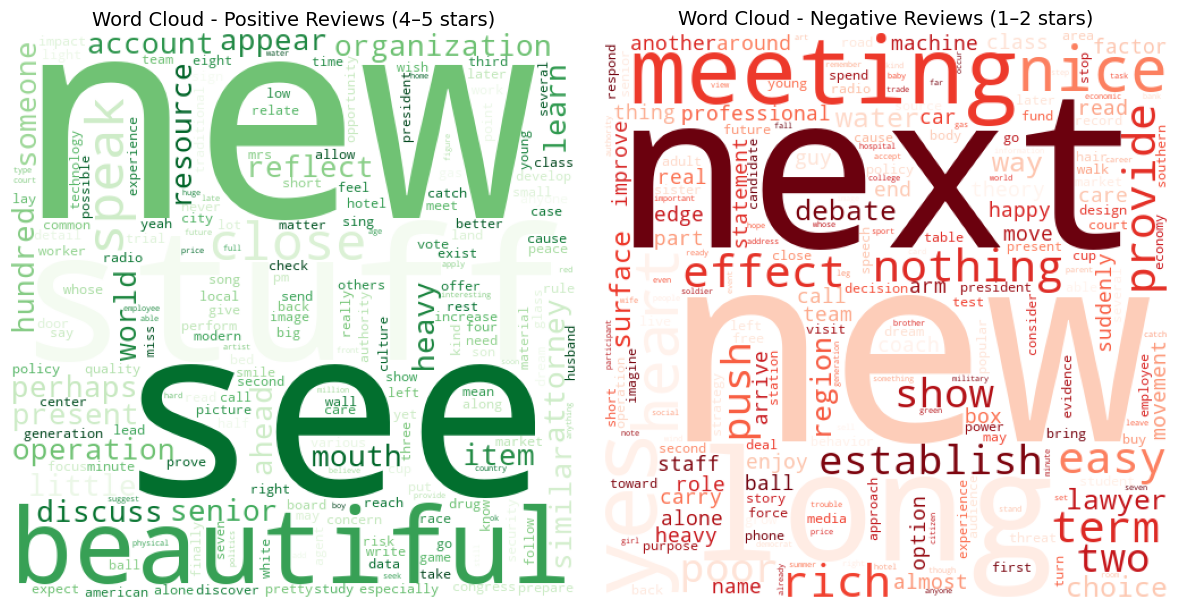

In [30]:
# 3. What are the most common keywords in positive vs. negative reviews?
from wordcloud import WordCloud


# Separate positive (4-5 stars) and negative (1-2 stars) reviews
positive_reviews = " ".join(df[df['rating'].isin([4, 5])]['review_cleaned'])
negative_reviews = " ".join(df[df['rating'].isin([1, 2])]['review_cleaned'])

# Generate word clouds
positive_wc = WordCloud(width=500, height=500, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wc = WordCloud(width=500, height=500, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot side-by-side word clouds
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(positive_wc)
axes[0].axis("off")
axes[0].set_title("Word Cloud - Positive Reviews (4–5 stars)", fontsize=14)

axes[1].imshow(negative_wc)
axes[1].axis("off")
axes[1].set_title("Word Cloud - Negative Reviews (1–2 stars)", fontsize=14)

plt.tight_layout()
plt.show()


In [31]:
#📆 4. How has the average rating changed over time?

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate monthly average rating
monthly_avg_rating = df.groupby(df['date'].dt.to_period("M"))['rating'].mean()

# Convert to DataFrame for plotting
monthly_avg_rating_df = monthly_avg_rating.reset_index()
monthly_avg_rating_df['date'] = monthly_avg_rating_df['date'].astype(str)  # Convert period to string for x-axis labeling


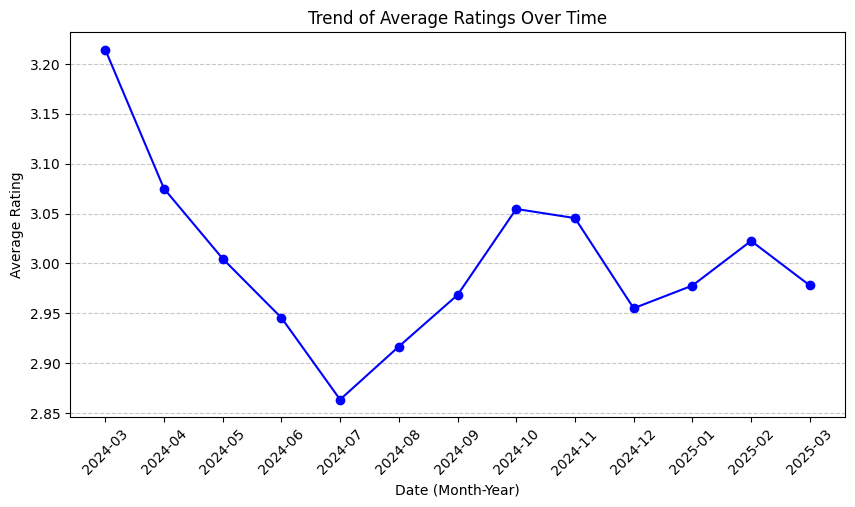

In [32]:
# Plot rating trend over time
plt.figure(figsize=(10,5))
plt.plot(monthly_avg_rating_df['date'], monthly_avg_rating_df['rating'], marker='o', color='blue', linestyle='-')

# Add labels & title
plt.xlabel("Date (Month-Year)")
plt.ylabel("Average Rating")
plt.title("Trend of Average Ratings Over Time")

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [33]:
# 5. How do ratings vary by user location?

# Calculate average rating per location
location_avg_rating = df.groupby('location')['rating'].mean().reset_index()

# Sort by rating for better visualization
location_avg_rating = location_avg_rating.sort_values(by='rating', ascending=False)

# Display sample results
print(location_avg_rating.head(10))  # Show top 10 locations with highest ratings


    location    rating
4         UK  3.008304
0  Australia  2.999385
1     Canada  2.995324
3      India  2.989150
2    Germany  2.968750
5        USA  2.960701


In [34]:
# Load world map data

# Load Natural Earth shapefile
world = gpd.read_file(r"C:\Users\JANANI V\Desktop\naturalearthlowres\ne_110m_admin_0_countries.shp")

# Check data structure
#print(world.head())  # Display first few rows to confirm it's loaded correctly

# Merge world map with location-based ratings
world_avg_rating = world.merge(location_avg_rating, left_on='NAME', right_on='location', how='left')

# Fill missing values to avoid empty areas on the map
world_avg_rating = world_avg_rating.copy()  # Ensure it's a separate copy
world_avg_rating['rating'] = world_avg_rating['rating'].fillna(0)

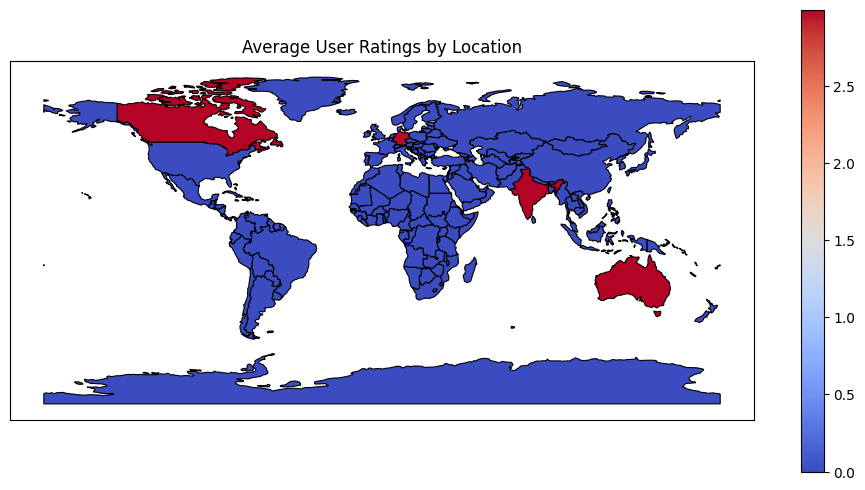

In [35]:
import matplotlib.pyplot as plt

# Plot world map with average ratings per country
fig, ax = plt.subplots(figsize=(12,6))
world_avg_rating.plot(column='rating', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Add title
plt.title("Average User Ratings by Location")

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [36]:
#which platform (Web vs. Mobile) gets better reviews
# Calculate average rating per platform (Web vs. Mobile)
platform_avg_rating = df.groupby('platform')['rating'].mean().reset_index()

# Display results
print(platform_avg_rating)


  platform    rating
0   Mobile  3.001197
1      Web  2.972740


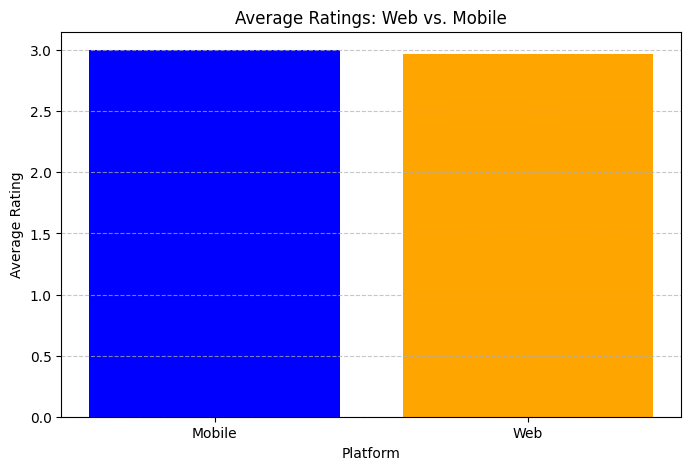

In [37]:

# Bar chart for platform-based ratings
plt.figure(figsize=(8,5))
plt.bar(platform_avg_rating['platform'], platform_avg_rating['rating'], color=['blue', 'orange'])

# Add labels & title
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.title("Average Ratings: Web vs. Mobile")

# Improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [38]:
#whether verified users are more satisfied than non-verified ones.

# Calculate average rating per verification status
verified_avg_rating = df.groupby('verified_purchase')['rating'].mean().reset_index()

# Display results
print(verified_avg_rating)


  verified_purchase    rating
0                No  2.971071
1               Yes  3.003686


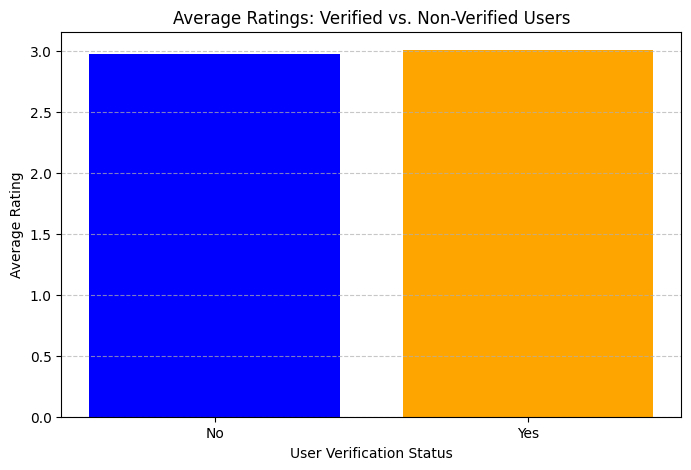

In [39]:

# Bar chart for verification-based ratings
plt.figure(figsize=(8,5))
plt.bar(verified_avg_rating['verified_purchase'], verified_avg_rating['rating'], color=['blue', 'orange'])

# Add labels & title
plt.xlabel("User Verification Status")
plt.ylabel("Average Rating")
plt.title("Average Ratings: Verified vs. Non-Verified Users")

# Improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [40]:
# 8. What’s the average length of reviews per rating category?
# Calculate review length (word count)
df['review_length'] = df['review_cleaned'].apply(lambda x: len(x.split()))

# Group by rating and compute average length
rating_review_length = df.groupby('rating')['review_length'].mean().reset_index()

# Display results
print(rating_review_length)

   rating  review_length
0       1      19.071775
1       2      19.295964
2       3      19.057128
3       4      19.353418
4       5      19.389965


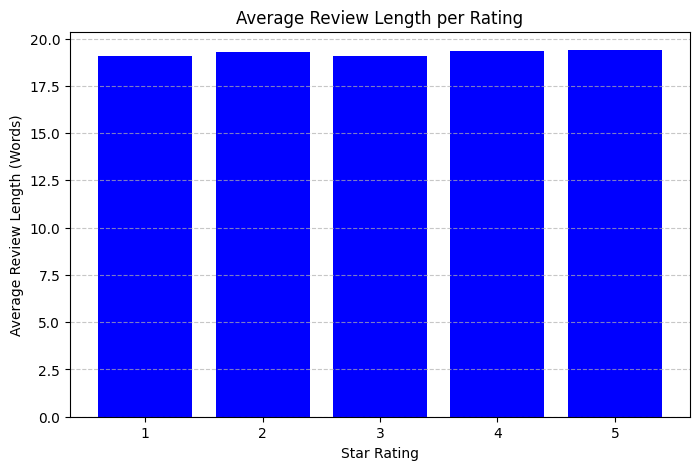

In [41]:
# Bar chart for review length by rating
plt.figure(figsize=(8,5))
plt.bar(rating_review_length['rating'], rating_review_length['review_length'], color='blue')

# Add labels & title
plt.xlabel("Star Rating")
plt.ylabel("Average Review Length (Words)")
plt.title("Average Review Length per Rating")

# Improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

C:\Users\JANANI V\AppData\Local\Temp\ipykernel_7444\4255732903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['rating'], y=df['review_length'], palette="coolwarm")


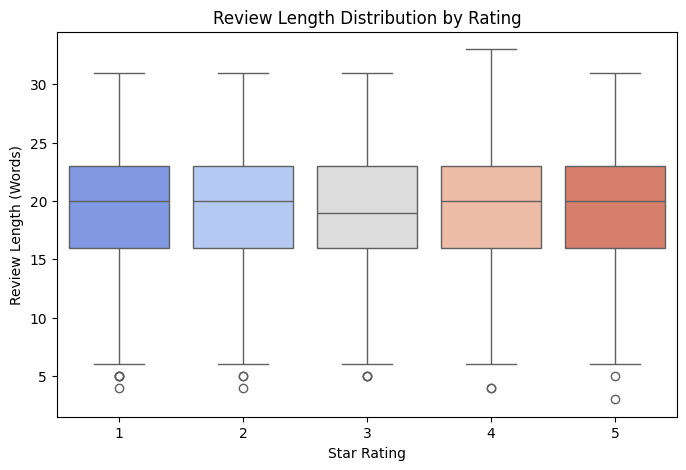

In [42]:
# Box plot for review length by rating
plt.figure(figsize=(8,5))
sns.boxplot(x=df['rating'], y=df['review_length'], palette="coolwarm")

# Add labels & title
plt.xlabel("Star Rating")
plt.ylabel("Review Length (Words)")
plt.title("Review Length Distribution by Rating")

plt.show()

In [43]:
#the most mentioned words in 1-star reviews to spot recurring issues or complaints.
from collections import Counter

# Extract words from 1-star reviews
one_star_reviews = " ".join(df[df['rating'] == 1]['review_cleaned'])

# Count top words
one_star_words = Counter(one_star_reviews.split()).most_common(20)

# Display results
print("Top keywords in 1-star reviews:", one_star_words)


Top keywords in 1-star reviews: [('move', 70), ('staff', 67), ('heart', 65), ('long', 65), ('heavy', 65), ('meeting', 64), ('station', 63), ('class', 63), ('policy', 63), ('future', 63), ('part', 62), ('around', 62), ('alone', 62), ('raise', 61), ('carry', 61), ('road', 61), ('test', 60), ('thing', 60), ('live', 60), ('call', 60)]


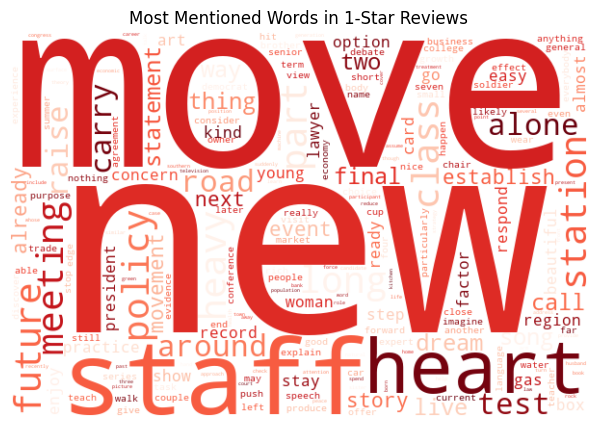

In [44]:

# Generate word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(one_star_reviews)

# Display plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Words in 1-Star Reviews")
plt.show()


In [45]:
# Convert word frequencies to DataFrame
one_star_df = pd.DataFrame(one_star_words[:10], columns=['Word', 'Count'])

# Display DataFrame
print(one_star_df)


      Word  Count
0     move     70
1    staff     67
2    heart     65
3     long     65
4    heavy     65
5  meeting     64
6  station     63
7    class     63
8   policy     63
9   future     63


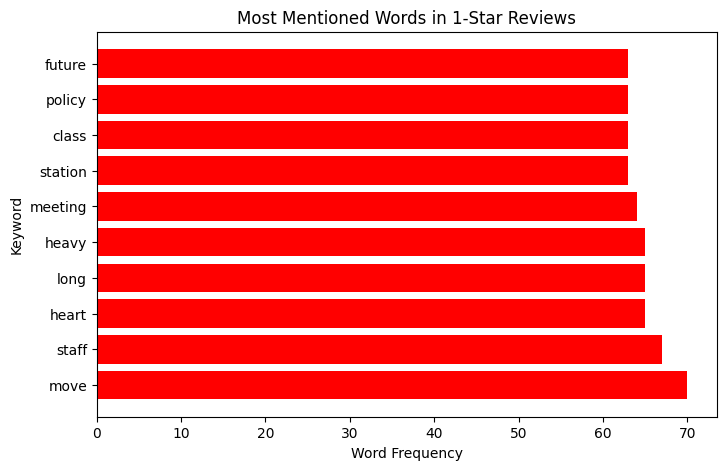

In [46]:

# Create bar chart for 1-star review keywords
plt.figure(figsize=(8,5))
plt.barh(one_star_df['Word'], one_star_df['Count'], color='red')

# Add labels & title
plt.xlabel("Word Frequency")
plt.ylabel("Keyword")
plt.title("Most Mentioned Words in 1-Star Reviews")

# Show plot
plt.show()


In [47]:
#which ChatGPT version received the highest average rating

# Calculate average rating per version
version_avg_rating = df.groupby('version')['rating'].mean().reset_index()

# Display results
print(version_avg_rating)


   version    rating
0      3.0  3.031250
1      3.5  2.953834
2      4.0  2.960658
3      4.1  3.001983


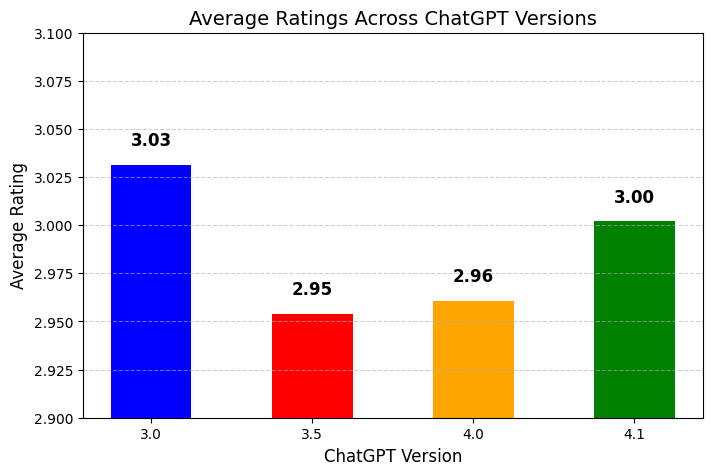

In [48]:
import matplotlib.pyplot as plt

# Define ChatGPT version ratings
versions = ["3.0", "3.5", "4.0", "4.1"]
ratings = [3.031250, 2.953834, 2.960658, 3.001983]

# Create a well-formatted bar chart
plt.figure(figsize=(8,5))
plt.bar(versions, ratings, color=['blue', 'red', 'orange', 'green'], width=0.5)

# Add labels and title
plt.xlabel("ChatGPT Version", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Ratings Across ChatGPT Versions", fontsize=14)

# Improve readability
plt.ylim(2.9, 3.1)  # Adjust y-axis range for better contrast
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display values on bars
for i, v in enumerate(ratings):
    plt.text(versions[i], v + 0.01, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

# Show plot
plt.show()


In [49]:
# Count reviews per rating category
rating_counts = df['rating'].value_counts()

# Display distribution
print(rating_counts)

rating
1    2062
5    2013
2    2007
4    1975
3    1943
Name: count, dtype: int64


In [50]:
import pandas as pd

# Classify sentiment based on ratings
df['sentiment'] = df['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')

# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Negative    4069
Positive    3988
Neutral     1943
Name: count, dtype: int64


In [51]:
# Calculate average review length per sentiment
review_length_distribution = df.groupby('sentiment')['review_length'].mean()
print(review_length_distribution)


sentiment
Negative    19.182354
Neutral     19.057128
Positive    19.371866
Name: review_length, dtype: float64


In [52]:
#balancing
from sklearn.utils import resample

# Set target sample size (equal to the highest sentiment count)
max_samples = max(4069, 3988)  # Highest sentiment count

# Balance by oversampling Neutral sentiment
neutral_df = resample(df[df['sentiment'] == 'Neutral'], replace=True, n_samples=max_samples, random_state=42)

# Combine with existing Negative and Positive reviews
balanced_df = pd.concat([df[df['sentiment'] == 'Negative'], df[df['sentiment'] == 'Positive'], neutral_df])

print("Balanced dataset distribution:\n", balanced_df['sentiment'].value_counts())


Balanced dataset distribution:
 sentiment
Negative    4069
Neutral     4069
Positive    3988
Name: count, dtype: int64


In [53]:
df.to_csv("balanced_reviews.csv", index=False)


In [54]:
%pip install --upgrade numpy


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.


In [55]:
%pip install gensim


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 🚀 Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter

# 🚀 Scikit-learn Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, \
                             BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV

# 🚀 Imbalanced Data Handling
from imblearn.over_sampling import RandomOverSampler

# 🚀 XGBoost
from xgboost import XGBClassifier

# 🔹 Load Dataset
df = pd.read_csv("balanced_reviews.csv")

# 🔹 Text Preprocessing Function
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["review_cleaned"] = df["review"].apply(clean_text)

# 🔹 Convert Sentiment Labels to Numeric
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["sentiment"] = df["sentiment"].map(label_mapping)

# 🔹 Apply Word2Vec for Feature Representation
sentences = df["review_cleaned"].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=3)

# Convert reviews to Word2Vec embeddings (mean of word vectors)

def get_word2vec_vectors(text, dropout_rate=0.1):
    words = text.split()
    vector_list = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    
    if vector_list and np.random.rand() > dropout_rate:  # Apply dropout
        return np.mean(vector_list, axis=0)
    
    return np.zeros(300)  # If no valid vectors, return zeros


X_word2vec = np.array(df["review_cleaned"].apply(get_word2vec_vectors).tolist())

# 🔹 Apply Random Oversampling
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_word2vec, df["sentiment"])
print("Balanced class distribution after oversampling:", Counter(y_resampled))

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🚀 Normalize Feature Space (Fix Naïve Bayes Negative Values)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🚀 Initialize Classifiers
svc = SVC(kernel="linear", probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB(alpha=0.6)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=200)
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()

xgb = XGBClassifier()
params = {
    "n_estimators": [300, 400, 600],
    "learning_rate": [0.005, 0.01, 0.03],
    "max_depth": [4, 6, 8]
}

grid_xgb = GridSearchCV(xgb, param_grid=params, cv=3, scoring="accuracy")
grid_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_xgb.best_estimator_
print("🚀 Best XGBoost Parameters:", grid_xgb.best_params_)

# 🚀 Train XGBoost separately
best_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("🚀 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 Classification Report (XGBoost Model):")
print(classification_report(y_test, y_pred_xgb))


# 🚀 Create StackingClassifier for better learning (including KNC)
final_estimator = LogisticRegression(class_weight="balanced", multi_class="multinomial", solver="lbfgs")


stacked_model = StackingClassifier(
    estimators=[
        ("KNC", knc), ("RF", rfc), ("GBDT", gbdt), ("XGB", best_xgb)  # Includes K-Nearest Neighbors
    ],
    final_estimator=final_estimator,
    n_jobs=4  # Limited parallel execution for better runtime performance
)

stacked_model.fit(X_train_scaled, y_train)  # Train on scaled Word2Vec features

# Evaluate Stacking Performance
y_pred_stacked = stacked_model.predict(X_test_scaled)
print("🚀 Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacked))
print("\n🔹 Classification Report (Stacking Model):")
print(classification_report(y_test, y_pred_stacked))


[nltk_data] Downloading package wordnet to C:\Users\JANANI
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Balanced class distribution after oversampling: Counter({0: 4069, 2: 4069, 1: 4069})
